In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | saint-augustin
Processing Record 7 of Set 1 | artyom
Processing Record 8 of Set 1 | armstrong
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | amapa
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | glenwood springs
Processing Record 14 of Set 1 | terney
Processing Record 15 of Set 1 | samusu
City not found. Skipping...
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | hirara
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of 

Processing Record 38 of Set 4 | sambava
Processing Record 39 of Set 4 | rio grande
Processing Record 40 of Set 4 | alenquer
Processing Record 41 of Set 4 | tezu
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | hwange
Processing Record 46 of Set 4 | oiba
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | soure
Processing Record 50 of Set 4 | ystad
Processing Record 1 of Set 5 | kysyl-syr
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | chapais
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | hovd
Processing Record 6 of Set 5 | salalah
Processing Record 7 of Set 5 | brasileia
Processing Record 8 of Set 5 | lagoa
Processing Record 9 of Set 5 | mae hong son
Processing Record 10 of Set 5 | satitoa
City not found. Skipping...
Processin

Processing Record 29 of Set 8 | borovskoy
Processing Record 30 of Set 8 | aswan
Processing Record 31 of Set 8 | mwinilunga
Processing Record 32 of Set 8 | sola
Processing Record 33 of Set 8 | grindavik
Processing Record 34 of Set 8 | lolua
City not found. Skipping...
Processing Record 35 of Set 8 | may pen
Processing Record 36 of Set 8 | calamar
Processing Record 37 of Set 8 | medea
Processing Record 38 of Set 8 | khislavichi
Processing Record 39 of Set 8 | umm lajj
Processing Record 40 of Set 8 | bijie
Processing Record 41 of Set 8 | polunochnoye
Processing Record 42 of Set 8 | ijaki
City not found. Skipping...
Processing Record 43 of Set 8 | yerbogachen
Processing Record 44 of Set 8 | guerrero negro
Processing Record 45 of Set 8 | hualmay
Processing Record 46 of Set 8 | filingue
Processing Record 47 of Set 8 | aden
Processing Record 48 of Set 8 | ouesso
Processing Record 49 of Set 8 | niksic
Processing Record 50 of Set 8 | san quintin
Processing Record 1 of Set 9 | kichera
Processing

Processing Record 14 of Set 12 | gonbad-e qabus
Processing Record 15 of Set 12 | kulhudhuffushi
Processing Record 16 of Set 12 | beringovskiy
Processing Record 17 of Set 12 | ayan
Processing Record 18 of Set 12 | sangar
Processing Record 19 of Set 12 | lamu
Processing Record 20 of Set 12 | black river
Processing Record 21 of Set 12 | karpogory
Processing Record 22 of Set 12 | stornoway
Processing Record 23 of Set 12 | flin flon
Processing Record 24 of Set 12 | port-cartier
Processing Record 25 of Set 12 | pizarro
Processing Record 26 of Set 12 | alcaniz
Processing Record 27 of Set 12 | eyemouth
Processing Record 28 of Set 12 | neiafu
Processing Record 29 of Set 12 | pisz
Processing Record 30 of Set 12 | coihaique
Processing Record 31 of Set 12 | puerto escondido
Processing Record 32 of Set 12 | america dourada
Processing Record 33 of Set 12 | obo
Processing Record 34 of Set 12 | leirvik
Processing Record 35 of Set 12 | thompson
Processing Record 36 of Set 12 | hofn
Processing Record 37

In [12]:
len(city_data)

560

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,30.36,86,14,8.08,GL,2021-11-03 19:37:56
1,Mataura,-46.1927,168.8643,50.49,60,8,2.91,NZ,2021-11-03 19:37:57
2,Barrow,71.2906,-156.7887,24.82,86,90,16.11,US,2021-11-03 19:37:57
3,Ushuaia,-54.8000,-68.3000,49.62,66,75,28.77,AR,2021-11-03 19:34:41
4,Geraldton,-28.7667,114.6000,55.81,88,6,11.50,AU,2021-11-03 19:37:58
5,Saint-Augustin,51.2260,-58.6502,44.15,58,7,11.50,CA,2021-11-03 19:37:58
6,Artyom,40.4723,50.3330,59.14,80,53,15.23,AZ,2021-11-03 19:37:59
7,Armstrong,-32.7822,-61.6022,80.58,40,0,4.83,AR,2021-11-03 19:37:59
8,Jamestown,42.0970,-79.2353,43.02,72,90,4.00,US,2021-11-03 19:37:19
9,Amapa,1.0000,-52.0000,81.82,68,100,2.84,BR,2021-11-03 19:38:00


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-11-03 19:37:56,65.6145,-37.6368,30.36,86,14,8.08
1,Mataura,NZ,2021-11-03 19:37:57,-46.1927,168.8643,50.49,60,8,2.91
2,Barrow,US,2021-11-03 19:37:57,71.2906,-156.7887,24.82,86,90,16.11
3,Ushuaia,AR,2021-11-03 19:34:41,-54.8000,-68.3000,49.62,66,75,28.77
4,Geraldton,AU,2021-11-03 19:37:58,-28.7667,114.6000,55.81,88,6,11.50


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
#Create a scatter plot with the data
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

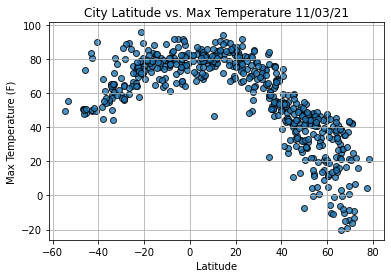

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

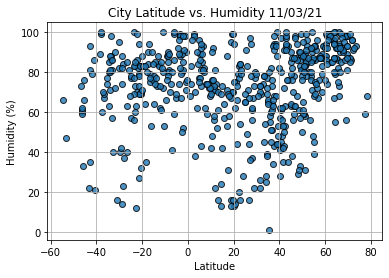

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()